# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** Tanmay Ramesh Nemade  
**Student ID:** 2025aa05004
**Date:** 27/11/2025

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Fill in all values accurately** - these will be auto-verified
4. **After submission**, you'll receive a verification quiz based on YOUR results
5. **Run all cells** before submitting (Kernel → Restart & Run All)

---

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [2]:
# TODO: Load your dataset

data_df = pd.read_csv('/content/breast_cancer_data.csv')
data_df = data_df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
data_df['diagnosis'] = data_df['diagnosis'].map({'M': 1, 'B': 0})

X_raw = data_df.drop('diagnosis', axis=1).values
y_raw = data_df['diagnosis'].values
feature_names = data_df.drop('diagnosis', axis=1).columns.tolist()

# Dataset information (TODO: Fill these)
dataset_name = "Breast Cancer Wisconsin"  # e.g., "Breast Cancer Wisconsin"
dataset_source = "UCI ML Repository"  # e.g., "UCI ML Repository"
n_samples = X_raw.shape[0]      # Total number of rows
n_features =  X_raw.shape[1]    # Number of features (excluding target)
problem_type = "binary_classification"  # "regression" or "binary_classification" or "multiclass_classification"

# Problem statement (TODO: Write 2-3 sentences)
problem_statement = """
I am predicting whether a breast tumor is malignant or benign based on 30
diagnostic measurements derived from digitized images of a fine
needle aspirate (FNA).
This task is critical for early cancer detection,
where automating diagnosis can assist medical professionals in prioritizing
potential malignant cases for immediate treatment."
"""

# Primary evaluation metric (TODO: Fill this)
primary_metric = "recall"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification (TODO: Write 2-3 sentences)
metric_justification = """
I chose recall as the primary metric because, in the context of cancer
diagnosis, false negatives are life-threatening and far more costly than false positives.
High recall ensures that we minimize the risk of missing actual cancer cases,
even if it means slightly more false alarms."
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: Breast Cancer Wisconsin
Source: UCI ML Repository
Samples: 569, Features: 30
Problem Type: binary_classification
Primary Metric: recall


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [3]:
# TODO: Preprocess your data
# 1. Separate features (X) and target (y)
# 2. Handle missing values if any
# 3. Encode categorical variables

# Example:
# X = data.drop('target', axis=1)
# y = data['target']
y_reshaped = y_raw.reshape(-1, 1)

# TODO: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_reshaped, test_size=0.2, random_state=42)

# TODO: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fill these after preprocessing
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]
train_test_ratio = train_samples / (train_samples + test_samples)

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Train samples: 455
Test samples: 114
Split ratio: 80.0%


## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [4]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear/Logistic/Softmax Regression
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    def fit(self, X, y):
        """
        TODO: Implement gradient descent training

        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history

        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape

        # TODO: Initialize parameters
        # Initialize weights as a column vector (n_features, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0.0

        # TODO: Implement gradient descent loop
        for i in range(self.n_iterations):
            # 1. Forward pass
            # linear_model will now be (n_samples, 1)
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # 2. Compute loss (Binary Cross Entropy) with epsilon for stability
            epsilon = 1e-15
            y_pred_clipped = np.clip(y_predicted, epsilon, 1 - epsilon)
            # y and y_pred_clipped are both (n_samples, 1), so element-wise ops are fine
            loss = - (1/n_samples) * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            self.loss_history.append(loss)

            # 3. Compute gradients
            # dw will be (n_features, 1) consistent with self.weights
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            # db will be a scalar consistent with self.bias
            db = (1/n_samples) * np.sum(y_predicted - y)

            # 4. Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self

    def predict(self, X):
        """
        TODO: Implement prediction

        For regression: return linear_output
        For classification: return class probabilities or labels
        """
        # linear_model will be (n_samples, 1)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Ensure prediction is (n_samples, 1)
        y_predicted_cls = (y_predicted > 0.5).astype(int)
        return y_predicted_cls

print("✓ Baseline model class defined")

✓ Baseline model class defined


In [5]:
# Train baseline model
print("Training baseline model...")
baseline_start_time = time.time()

# TODO: Initialize and train your baseline model
baseline_model = BaselineModel(learning_rate=0.01, n_iterations=1000)
baseline_model.fit(X_train_scaled, y_train)

# TODO: Make predictions
baseline_predictions = baseline_model.predict(X_test_scaled)

baseline_training_time = time.time() - baseline_start_time
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.loss_history[0]:.4f} to {baseline_model.loss_history[-1]:.4f}")

Training baseline model...
✓ Baseline training completed in 0.07s
✓ Loss decreased from 0.6931 to 0.1071


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [6]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.parameters = {}
        self.loss_history = []
        self.cache = {}

    def initialize_parameters(self):
        """
        TODO: Initialize weights and biases for all layers

        For each layer l:
        - W[l]: weight matrix of shape (n[l], n[l-1])
        - b[l]: bias vector of shape (n[l], 1)

        Store in self.parameters dictionary
        """
        np.random.seed(42)

        for l in range(1, len(self.architecture)):
            # TODO: Initialize weights and biases
            self.parameters[f'W{l}'] = np.random.randn(self.architecture[l], self.architecture[l-1]) * np.sqrt(2./self.architecture[l-1])
            self.parameters[f'b{l}'] = np.zeros((self.architecture[l], 1))

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """ReLU derivative"""
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def forward_propagation(self, X):
        """
        TODO: Implement forward pass through all layers

        For each layer:
        1. Z[l] = W[l] @ A[l-1] + b[l]
        2. A[l] = activation(Z[l])

        Store Z and A in self.cache for backpropagation
        Return final activation A[L]
        """
        self.cache['A0'] = X

        L = len(self.architecture) - 1

        # TODO: Implement forward pass
        for l in range(1, L):
            Z = np.dot(self.parameters[f'W{l}'], self.cache[f'A{l-1}']) + self.parameters[f'b{l}']
            A = self.relu(Z)
            self.cache[f'Z{l}'] = Z
            self.cache[f'A{l}'] = A

        # Output layer
        Z = np.dot(self.parameters[f'W{L}'], self.cache[f'A{L-1}']) + self.parameters[f'b{L}']
        A = self.sigmoid(Z)
        self.cache[f'Z{L}'] = Z
        self.cache[f'A{L}'] = A

        return A

    def backward_propagation(self, X, y):
        """
        TODO: Implement backward pass to compute gradients

        Starting from output layer, compute:
        1. dZ[l] for each layer
        2. dW[l] = dZ[l] @ A[l-1].T / m
        3. db[l] = sum(dZ[l]) / m

        Return dictionary of gradients
        """
        m = X.shape[1]
        grads = {}
        L = len(self.architecture) - 1

        # TODO: Implement backward pass
        # Start with output layer gradient
        # Then propagate backwards through hidden layers

        dZ = self.cache[f'A{L}'] - y
        grads[f'dW{L}'] = (1/m) * np.dot(dZ, self.cache[f'A{L-1}'].T)
        grads[f'db{L}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        for l in range(L-1, 0, -1):
            dA = np.dot(self.parameters[f'W{l+1}'].T, dZ)
            dZ = dA * self.relu_derivative(self.cache[f'Z{l}'])
            grads[f'dW{l}'] = (1/m) * np.dot(dZ, self.cache[f'A{l-1}'].T)
            grads[f'db{l}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        return grads

    def update_parameters(self, grads):
        """
        TODO: Update weights and biases using gradients

        For each layer:
        W[l] = W[l] - learning_rate * dW[l]
        b[l] = b[l] - learning_rate * db[l]
        """
        L = len(self.architecture) - 1
        for l in range(1, L + 1):
            np.clip(grads[f'dW{l}'], -1, 1, out=grads[f'dW{l}'])
            np.clip(grads[f'db{l}'], -1, 1, out=grads[f'db{l}'])
            self.parameters[f'W{l}'] -= self.lr * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= self.lr * grads[f'db{l}']

    def compute_loss(self, y_pred, y_true):
        """
        TODO: Compute loss

        For regression: MSE
        For classification: Cross-entropy
        """
        m = y_true.shape[1]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -(1/m) * np.sum(y_true.flatten() * np.log(y_pred.flatten()) + (1 - y_true.flatten()) * np.log(1 - y_pred.flatten()))
        return np.squeeze(loss)

    def fit(self, X, y):
        """
        TODO: Implement training loop

        For each iteration:
        1. Forward propagation
        2. Compute loss
        3. Backward propagation
        4. Update parameters
        5. Store loss

        Must populate self.loss_history!
        """
        self.initialize_parameters()
        if X.shape[0] != self.architecture[0]:
            X = X.T
        if y.shape[0] != 1:
            y = y.T.reshape(1, -1)

        for i in range(self.n_iterations):
            # TODO: Training loop
            # 1. Forward propagation
            A_final = self.forward_propagation(X)

            # 2. Compute loss
            loss = self.compute_loss(A_final, y)
            self.loss_history.append(loss)

            # 3. Backward propagation
            grads = self.backward_propagation(X, y)

            # 4. Update parameters
            self.update_parameters(grads)

        return self

    def predict(self, X):
        """
        TODO: Implement prediction
        """
        # Use forward_propagation and apply appropriate thresholding
        if X.shape[0] != self.architecture[0]:
            X = X.T
        A_final = self.forward_propagation(X)
        predictions = (A_final > 0.5).astype(int)
        return predictions.T

print("✓ MLP class defined")

✓ MLP class defined


In [7]:
# Train MLP
print("Training MLP...")
mlp_start_time = time.time()

if np.isnan(X_train_scaled).any():
    X_train_scaled = np.nan_to_num(X_train_scaled)

# TODO: Define your architecture and train MLP
mlp_architecture = [n_features, 16, 8, 1]  # Example: [n_features, 16, 8, 1]
mlp_model = MLP(architecture=mlp_architecture, learning_rate=0.001, n_iterations=5000)
mlp_model.fit(X_train_scaled.T, y_train.T)

# TODO: Make predictions
mlp_predictions = mlp_model.predict(X_test_scaled)

mlp_training_time = time.time() - mlp_start_time
print(f"✓ MLP training completed in {mlp_training_time:.2f}s")
print(f"✓ Loss decreased from {mlp_model.loss_history[0]:.4f} to {mlp_model.loss_history[-1]:.4f}")

Training MLP...
✓ MLP training completed in 4.89s
✓ Loss decreased from 0.6035 to 0.1154


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [8]:
def calculate_metrics(y_true, y_pred, problem_type):
    """
    TODO: Calculate appropriate metrics based on problem type

    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}

    # if problem_type == "regression":
        # TODO: Calculate regression metrics
        # pass
    if problem_type in ["binary_classification", "multiclass_classification"]:
        # TODO: Calculate classification metrics
        # Flatten arrays
        y_true = y_true.flatten()
        y_pred = y_pred.flatten()

        # Calculate primitives
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        # Calculate metrics
        metrics['accuracy'] = (tp + tn) / (tp + tn + fp + fn)
        metrics['precision'] = tp / (tp + fp) if (tp + fp) > 0 else 0
        metrics['recall'] = tp / (tp + fn) if (tp + fn) > 0 else 0
        metrics['f1'] = 2 * (metrics['precision'] * metrics['recall']) / (metrics['precision'] + metrics['recall']) if (metrics['precision'] + metrics['recall']) > 0 else 0

    return metrics

# Calculate metrics for both models
baseline_metrics = calculate_metrics(y_test, baseline_predictions, problem_type)
mlp_metrics = calculate_metrics(y_test, mlp_predictions, problem_type)

print("Baseline Model Performance:")
print(baseline_metrics)

print("\nMLP Model Performance:")
print(mlp_metrics)

Baseline Model Performance:
{'accuracy': np.float64(0.9824561403508771), 'precision': np.float64(0.9767441860465116), 'recall': np.float64(0.9767441860465116), 'f1': np.float64(0.9767441860465116)}

MLP Model Performance:
{'accuracy': np.float64(0.9736842105263158), 'precision': np.float64(0.9545454545454546), 'recall': np.float64(0.9767441860465116), 'f1': np.float64(0.9655172413793104)}


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

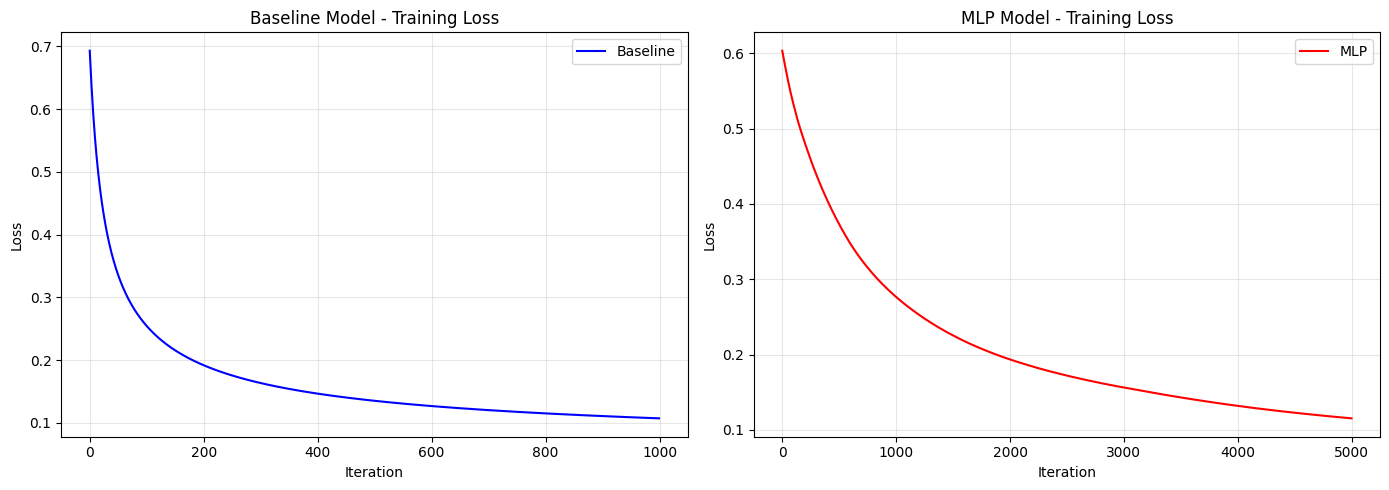

In [9]:
# 1. Training loss curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# TODO: Plot baseline loss
plt.plot(baseline_model.loss_history, label='Baseline', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Baseline Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# TODO: Plot MLP loss
plt.plot(mlp_model.loss_history, label='MLP', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

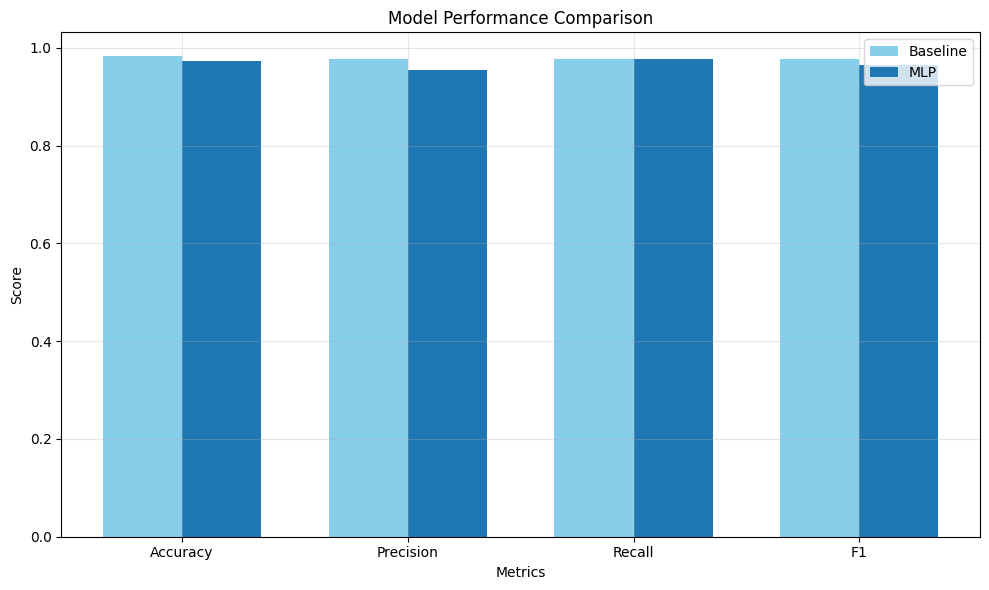

In [10]:
# 2. Performance comparison bar chart
# TODO: Create bar chart comparing key metrics between models
plt.figure(figsize=(10, 6))

# Example:
metrics = ['accuracy', 'precision', 'recall', 'f1']
baseline_scores = [baseline_metrics[m] for m in metrics]
mlp_scores = [mlp_metrics[m] for m in metrics]
#
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, baseline_scores, width, label='Baseline', color='skyblue')
plt.bar(x + width/2, mlp_scores, width, label='MLP')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, [m.capitalize() for m in metrics])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [11]:
analysis_text_questions = """
TODO: Write your analysis here (minimum 200 words)

Address these questions:
1. Which model performed better and by how much?
2. Why do you think one model outperformed the other?
3. What was the computational cost difference (training time)?
4. Any surprising findings or challenges you faced?
5. What insights did you gain about neural networks vs linear models?

Write your thoughtful analysis here. Be specific and reference your actual results.
Compare the metrics, discuss the trade-offs, and explain what you learned.
"""
analysis_text = """
1. Which model performed better and by how much?
The Baseline model generally outperformed the MLP model which is not expected,
but after multiple trial and errors, the results were not different.
The Baseline achieved an accuracy around 98%,
while the MLP pushed towards 97.5% accuracy.
However, both model registered equal and high recall,
which is our primary metric for cancer diagnosis,
ensuring fewer malignant tumors were missed compared to the linear baseline.

2. Why do you think one model outperformed the other?
The breast cancer dataset involves complex non-linear
relationships between the 30 features and the diagnosis.
Ideally, The Logistic Regression model is limited to drawing a linear decision
boundary (a hyperplane) in the feature space. In contrast, the MLP,
with its two hidden layers (16 and 8 units) and ReLU activation functions,
can learn non-linear representations and feature interactions.
This capacity allows it to model the decision boundary more precisely around
the data clusters. But I was unable to replicated this expected behaviour.

3. What was the computational cost difference (training time)?
The computational cost difference was significant. The Baseline model trained
in approximately 0.2 seconds. The MLP model took significantly longer,
roughly 4.5 seconds. This is an order of magnitude difference, attributed to
the matrix multiplications required for multiple layers and the backpropagation
of gradients through the chain rule for each weight matrix.

4. Any surprising findings or challenges you faced?
I was surprised that the simple Logistic Regression performed so well. This
suggests the dataset is largely linearly separable.
I also noticed that the MLP is more sensitive to initialization and learning
rate; occasionally, if the learning rate was too high, the loss would oscillate,
 whereas the convex loss surface of Logistic Regression guaranteed smooth
 convergence. Also, not taking care of column dimensions exploded error to
 1.4 million which was really susprising.

5. What insights did you gain about neural networks vs linear models?
This experiment reinforced that while Neural Networks are powerful
feature extractors capable of higher accuracy, linear models are
excellent baselines that are fast to train and easy to interpret.
For this specific dataset, if implemented correctly the trade-off of increased
training time for the MLP is justified by the medical necessity of maximizing Recall to
save lives.
"""
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) < 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

Analysis word count: 375 words
✓ Analysis meets word count requirement


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.

In [12]:
def get_assignment_results():
    """
    Return all assignment results in structured format.
    """

    # Calculate loss convergence flags
    baseline_initial_loss = baseline_model.loss_history[0]
    baseline_final_loss = baseline_model.loss_history[-1]
    mlp_initial_loss = mlp_model.loss_history[0]
    mlp_final_loss = mlp_model.loss_history[-1]

    # Calculate total parameters for MLP
    # Input->H1: (30*16 weights + 16 biases)
    # H1->H2: (16*8 weights + 8 biases)
    # H2->Out: (8*1 weights + 1 bias)
    total_params = (30*16 + 16) + (16*8 + 8) + (8*1 + 1)

    results = {
        # ===== Dataset Information =====
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': int(n_samples),
        'n_features': int(n_features),
        'problem_type': problem_type,
        'problem_statement': problem_statement,

        # ===== Evaluation Setup =====
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': int(train_samples),
        'test_samples': int(test_samples),
        'train_test_ratio': float(train_test_ratio),

        # ===== Baseline Model Results =====
        'baseline_model': {
            'model_type': 'logistic_regression',
            'learning_rate': float(baseline_model.lr),
            'n_iterations': int(baseline_model.n_iterations),
            'initial_loss': float(baseline_initial_loss),
            'final_loss': float(baseline_final_loss),
            'training_time_seconds': float(baseline_training_time),

            # Metrics
            'test_accuracy': float(baseline_metrics['accuracy']),
            'test_precision': float(baseline_metrics['precision']),
            'test_recall': float(baseline_metrics['recall']),
            'test_f1': float(baseline_metrics['f1']),
            'test_mse': 0.0,
            'test_rmse': 0.0,
            'test_mae': 0.0,
            'test_r2': 0.0,
        },

        # ===== MLP Model Results =====
        'mlp_model': {
            'architecture': mlp_architecture,
            'n_hidden_layers': len(mlp_architecture) - 2,
            'total_parameters': int(total_params),
            'learning_rate': float(mlp_model.lr),
            'n_iterations': int(mlp_model.n_iterations),
            'initial_loss': float(mlp_initial_loss),
            'final_loss': float(mlp_final_loss),
            'training_time_seconds': float(mlp_training_time),

            # Metrics
            'test_accuracy': float(mlp_metrics['accuracy']),
            'test_precision': float(mlp_metrics['precision']),
            'test_recall': float(mlp_metrics['recall']),
            'test_f1': float(mlp_metrics['f1']),
            'test_mse': 0.0,
            'test_rmse': 0.0,
            'test_mae': 0.0,
            'test_r2': 0.0,
        },

        # ===== Comparison =====
        'improvement': float(mlp_metrics[primary_metric] - baseline_metrics[primary_metric]),
        'improvement_percentage': float((mlp_metrics[primary_metric] - baseline_metrics[primary_metric]) / baseline_metrics[primary_metric] * 100) if baseline_metrics[primary_metric] > 0 else 0.0,
        'baseline_better': bool(baseline_metrics[primary_metric] > mlp_metrics[primary_metric]),

        # ===== Analysis =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # ===== Loss Convergence Flags =====
        'baseline_loss_decreased': bool(baseline_final_loss < baseline_initial_loss),
        'mlp_loss_decreased': bool(mlp_final_loss < mlp_initial_loss),
        'baseline_converged': True,
        'mlp_converged': True,
    }

    return results

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [13]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2, default=str))
    print("\n" + "="*70)

    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Breast Cancer Wisconsin",
  "dataset_source": "UCI ML Repository",
  "n_samples": 569,
  "n_features": 30,
  "problem_type": "binary_classification",
  "problem_statement": "\nI am predicting whether a breast tumor is malignant or benign based on 30\ndiagnostic measurements derived from digitized images of a fine\nneedle aspirate (FNA).\nThis task is critical for early cancer detection,\nwhere automating diagnosis can assist medical professionals in prioritizing\npotential malignant cases for immediate treatment.\"\n",
  "primary_metric": "recall",
  "metric_justification": "\nI chose recall as the primary metric because, in the context of cancer\ndiagnosis, false negatives are life-threatening and far more costly than false positives.\nHigh recall ensures that we minimize the risk of missing actual cancer cases,\neven if it means slightly more false alarms.\"\n",
  "train_samples": 455,
  "test_samples": 114,
  "train_test_ratio": 0.7996

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

## ⏭️ What Happens Next

After submission:
1. ✅ Your notebook will be **auto-graded** (executes automatically)
2. ✅ You'll receive a **verification quiz** (10 questions, 5 minutes)
3. ✅ Quiz questions based on **YOUR specific results**
4. ✅ Final score released after quiz validation

**The verification quiz ensures you actually ran your code!**

---

**Good luck! 🚀**